<a href="https://colab.research.google.com/github/mrmarcoscardoso/data_science/blob/master/M1_8_Analisando_os_Dados_do_Airbnb_San_Diego%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [marcos cardoso](https://github.com/mrmarcoscardoso/data_science)*

---

# Análise dos Dados do Airbnb - *San Diego, USA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade San Diego, USA, e ver quais insights podem ser extraídos a partir de dados brutos.**

Link do csv: http://data.insideairbnb.com/united-states/ca/san-diego/2020-05-21/visualisations/listings.csv

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-diego/2020-05-21/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel 
* `name` - nome da propriedade anunciada
* `host_id` - número de id do anfitrião da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - está coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que o imóvel possui 
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês 
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,NaN,3,206
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,60,2018-08-09,0.50,5,259
2,38245,Point Loma: Den downstairs,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,75,1,143,2019-10-20,1.21,3,340
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.73188,-117.11918,Entire home/apt,74,3,400,2020-03-16,3.34,1,257
4,54001,La Jolla 2 Bdrm Prvte Cottage-Prvte Garden,252692,Marsha,NaN,La Jolla,32.81301,-117.26856,Private room,80,2,220,2020-03-16,1.93,3,329


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 13097
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

*   É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes;
*   As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 18% das linhas;
*   A vaiável `host_name` possui cerca de 0,2% de valores nulos.  

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  17.836146
last_review                        17.836146
host_name                           0.022906
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

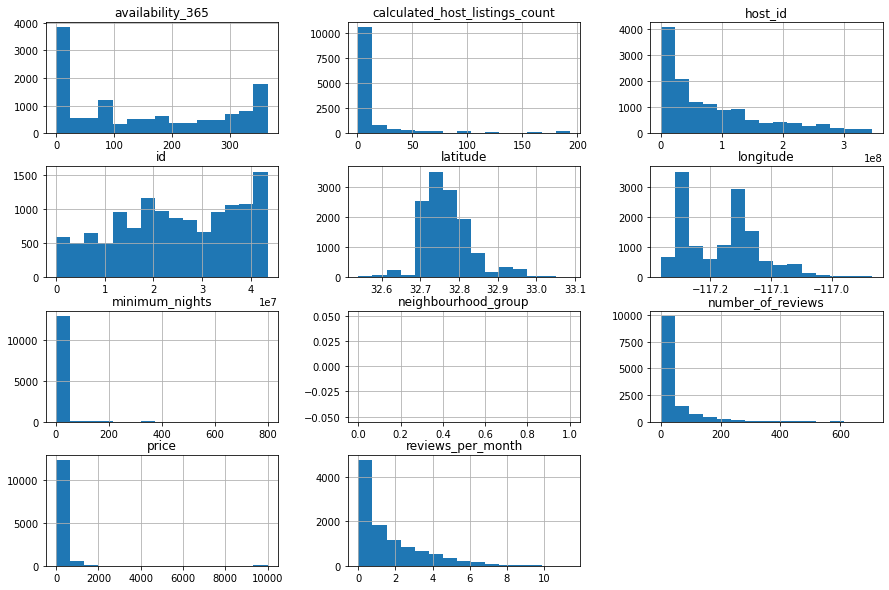

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

*   Resumo estatístico por meio do método `describe()`;
*   Plotar `boxplots` para a variável.


In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price',
    'minimum_nights', 
    'number_of_reviews',
    'reviews_per_month', 
    'calculated_host_listings_count',
    'availability_365'
    ]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13097.000000,13097.000000,13097.000000,10761.000000,13097.000000,13097.000000
mean,300.489425,5.618462,37.851645,1.670516,14.511949,152.070398
std,920.105837,19.298400,65.635879,1.812261,33.978761,135.050998
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.000000,1.000000,0.300000,1.000000,1.000000
50%,139.000000,2.000000,10.000000,0.980000,2.000000,126.000000
75%,250.000000,3.000000,45.000000,2.520000,8.000000,292.000000
max,10000.000000,800.000000,706.000000,11.380000,193.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses, como:

*   A variável `price` possui 75% dos valores abaixo de 250, porém seu valor máximo é de 10000; 
*   A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


#### Boxplot para minimum_nights


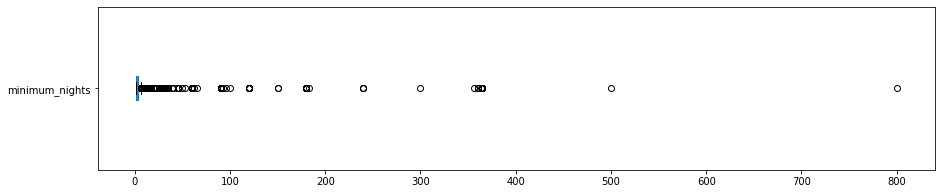


minimum_nights: valores acima de 30:
232 entradas
1.7714%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print('\nminimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

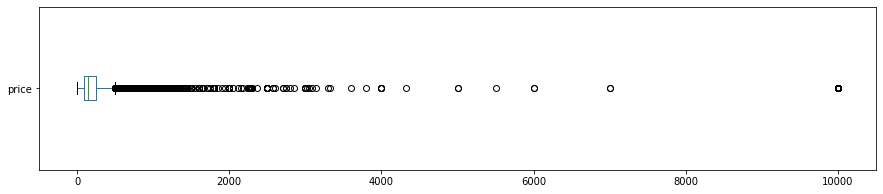


price: valores acima de 1000:
323 entradas
2.4662%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 1000 para price
print('\nprice: valores acima de 1000:')
print('{} entradas'.format(len(df[df.price > 1000])))
print('{:.4f}%'.format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


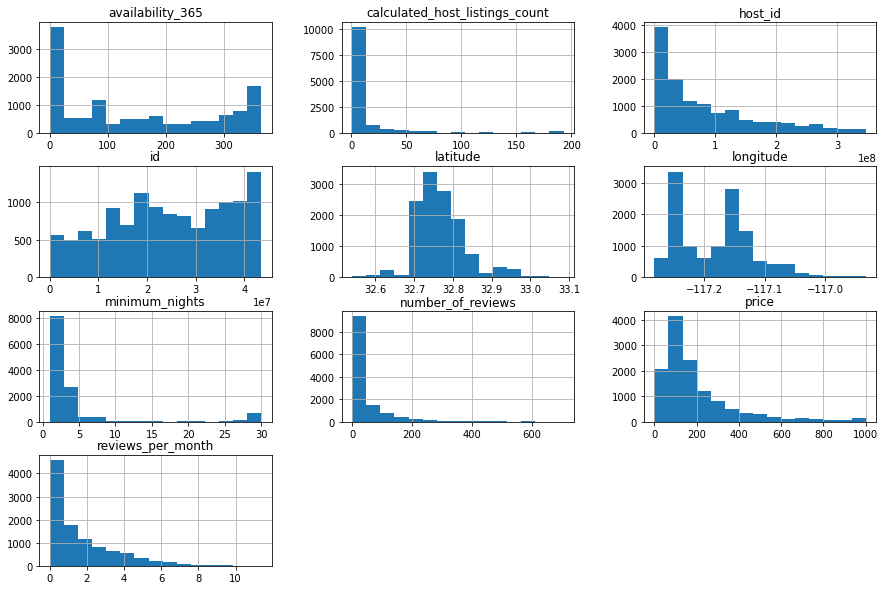

In [10]:
# removendo os outliers e criando um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.minimum_nights > 30].index, axis=0, inplace=True)

# removendo neighbourhood_group, pois não há valores válidos
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelelhança entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a necessidade dela. Para identificar correlações existentes entre as variáveis de interesse, vamos:

*   Criar uma matriz de correlação;
*   gerar um *heatmap* a partir dessa matriz, usando a bibiloteca `seaborn`.



In [11]:
# criar uma matriz de correlação
corr = df_clean[['price', 
                 'minimum_nights', 
                 'number_of_reviews', 
                 'reviews_per_month', 
                 'calculated_host_listings_count', 
                 'availability_365'
                ]].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.068364,-0.164499,-0.194358,0.319840,0.181868
minimum_nights,-0.068364,1.000000,-0.113537,-0.157506,-0.056841,0.096127
number_of_reviews,-0.164499,-0.113537,1.000000,0.716394,-0.126394,0.069793
reviews_per_month,-0.194358,-0.157506,0.716394,1.000000,-0.145481,0.024906
calculated_host_listings_count,0.319840,-0.056841,-0.126394,-0.145481,1.000000,0.202493
availability_365,0.181868,0.096127,0.069793,0.024906,0.202493,1.000000


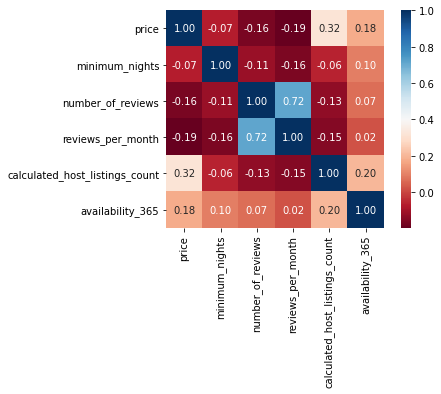

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de aparatamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o métodos `value_counts()`.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9219
Private room       3153
Shared room         150
Hotel room           26
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    73.469876
Private room       25.127510
Shared room         1.195410
Hotel room          0.207204
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara em San Diego?**
Uma maneira de ser verificar uma varável em função da outra é usando o `groupby()`. No caso, queremos comparar os bairros (`neighnourhoods`) a partir do preço de locação. 


In [15]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Tijuana River Valley    360.000000
La Jolla                342.887742
Wooded Area             336.482143
Mission Bay             322.998124
Del Mar Heights         313.951220
Rolling Hills Ranch     309.125000
Rancho Del Rey          308.000000
Horton Plaza            303.500000
Torrey Pines            262.066667
North City              260.555556
Name: price, dtype: float64

Acima é possível verificar que a diferença entre a média dos valores é de cerca de 100. 

#### Verificando a quantidade de imóveis por bairro


In [16]:
# verificando a quantidade de imíves por bairro
df_clean.neighbourhood.value_counts()

Mission Bay                    1599
Pacific Beach                  1066
East Village                    841
La Jolla                        775
North Hills                     651
                               ... 
Amphitheater And Water Park       3
Lincoln Park                      3
Horton Plaza                      2
Eastlake Trails                   2
Tijuana River Valley              1
Name: neighbourhood, Length: 102, dtype: int64

É possível verificar acima que o bairro (*Tijuana River Valley*) com a maior média possui um valor não representativo, pois como é possível verificar acima, há apenas 1 imóvel neste bairro. 
O bairro com a segunda maior média (*La Jolla*) apresenta 775 imóveis. 

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

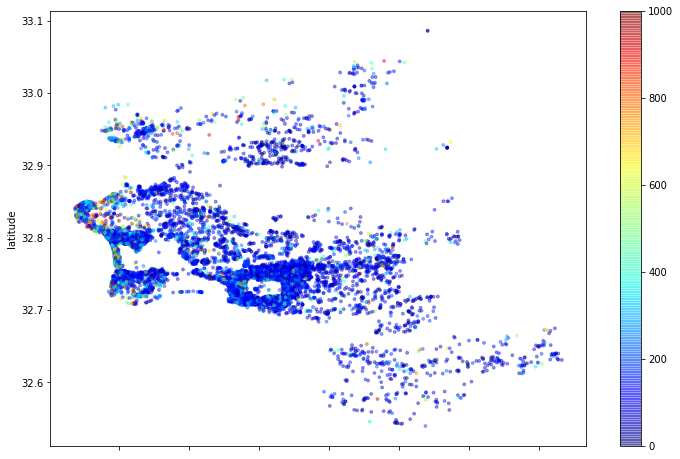

In [17]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [18]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.050366592285624

## Conclusões


Foi feita uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas vairáveis. 

Também notou-se que em alguns bairros há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, como o preço.

Por fim, lembra-se que este *dataset* é a versão resumida (summary), ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos com 106 atributos disponíveis. 